In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# import function to perform feature selection
from sklearn.feature_selection import RFE
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [15,8]

# Summarize important observations from the data set (5 Marks)

# Some pointers which would help you, but don’t be limited by these

# a. Find out number of rows; no. & types of variables (continuous, categorical etc.)

# b. Calculate five-point summary for numerical variables

# c. Summarize observations for categorical variables – no. of categories, % observations in each category

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000000,1,1,1,101348.880000,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860000,1,0,1,112542.580000,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800000,3,1,0,113931.570000,1
3,4,15701354,Boni,699,France,Female,39,1,0.000000,2,0,0,93826.630000,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820000,1,1,1,79084.100000,0


In [4]:
df = df.drop(columns=['RowNumber','CustomerId'])
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.000000,1,1,1,101348.880000,1
1,Hill,608,Spain,Female,41,1,83807.860000,1,0,1,112542.580000,0
2,Onio,502,France,Female,42,8,159660.800000,3,1,0,113931.570000,1
3,Boni,699,France,Female,39,1,0.000000,2,0,0,93826.630000,0
4,Mitchell,850,Spain,Female,43,2,125510.820000,1,1,1,79084.100000,0


In [5]:
df.shape

(10000, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [7]:
# Categorical Variables
df_cat = df.select_dtypes('object')
df_cat.head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [8]:
for i in df_cat.columns:
    print(df_cat[i].value_counts()/len(df_cat)*100)
    print()
    print()

Smith                     0.320000
Scott                     0.290000
Martin                    0.290000
Walker                    0.280000
Brown                     0.260000
Yeh                       0.250000
Shih                      0.250000
Genovese                  0.250000
Maclean                   0.240000
Wright                    0.240000
Wilson                    0.230000
White                     0.230000
Ma                        0.230000
Fanucci                   0.230000
Wang                      0.220000
Moore                     0.220000
Chu                       0.220000
Lu                        0.220000
Johnson                   0.220000
Thompson                  0.210000
Sun                       0.210000
McGregor                  0.210000
Mai                       0.210000
Jamieson                  0.200000
Kerr                      0.200000
Shen                      0.200000
Fang                      0.200000
Hughes                    0.200000
Lo                  

In [9]:
df_cat['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
df_cat['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [11]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df_cat['Labelled Geography'] = le.fit_transform(df_cat['Geography'])
df_cat['Labelled Gender'] = le.fit_transform(df_cat['Gender'])
df_cat.head()

,Surname,Geography,Gender,Labelled Geography,Labelled Gender
0,Hargrave,France,Female,0,0
1,Hill,Spain,Female,2,0
2,Onio,France,Female,0,0
3,Boni,France,Female,0,0
4,Mitchell,Spain,Female,2,0


In [12]:
df_cat = df_cat.drop(columns=['Surname','Geography','Gender'])
df_cat.head()

,Labelled Geography,Labelled Gender
0,0,0
1,2,0
2,0,0
3,0,0
4,2,0


In [13]:
# Numerical Variables
df_num = df.select_dtypes(np.number)
df_num.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.000000,1,1,1,101348.880000,1
1,608,41,1,83807.860000,1,0,1,112542.580000,0
2,502,42,8,159660.800000,3,1,0,113931.570000,1
3,699,39,1,0.000000,2,0,0,93826.630000,0
4,850,43,2,125510.820000,1,1,1,79084.100000,0


# Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 Marks)

# Some pointers which would help you, but don’t be limited by these

# a. Do variables have missing/null values?

# b. Do variables have outliers?

# c. Is the Target distributed evenly? Is it a defect? If Yes, what steps are being taken to rectify the problem.

In [14]:
df.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

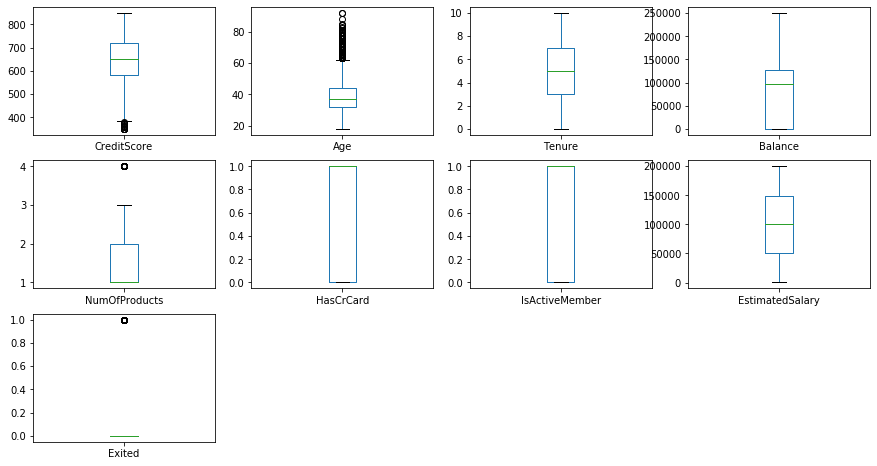

In [15]:
df.plot(kind='box',subplots=True,layout=(3,4))
plt.show()

There are outliers present from the above Analysis, but we shall build a basic Model to check the performance

In [16]:
df1 = pd.concat([df_num,df_cat],axis=1)
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Labelled Geography,Labelled Gender
0,619,42,2,0.000000,1,1,1,101348.880000,1,0,0
1,608,41,1,83807.860000,1,0,1,112542.580000,0,2,0
2,502,42,8,159660.800000,3,1,0,113931.570000,1,0,0
3,699,39,1,0.000000,2,0,0,93826.630000,0,0,0
4,850,43,2,125510.820000,1,1,1,79084.100000,0,2,0


In [17]:
df1['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

The target variable is not evenly distributed

# Summarize relationships among variables (5 marks)

# a. Plot relevant categorical plots. Find out which are the variables most correlated or appear to be in causation with Target? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?

# b. Plot all independent variables with the target & find out the relationship? Perform the Relevant Tests to find out if the Independent variables are associated with the Target Variable.

# Hint: based on your observations you may want to transform features or create additional features

In [18]:
#plt.figure(figsize=(20, 10))
#sns.pairplot(df1)
#plt.show()

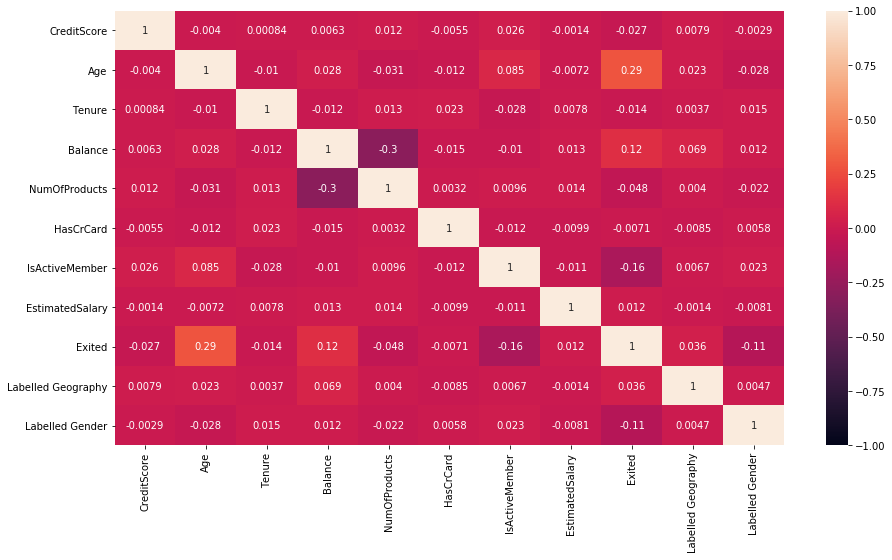

In [19]:
# Correlation Matrix
sns.heatmap(df1.corr(),vmin=-1,vmax=1,annot=True)

In [20]:
df1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Labelled Geography,Labelled Gender
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.705500,0.515100,100090.239881,0.203700,0.746300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.455840,0.499797,57510.492818,0.402769,0.827529,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,2.000000,1.000000


# Split dataset into train and test (70:30)random_state=100 (1 mark)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df1.drop(columns=['Exited'])
Y = df1['Exited']

In [23]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Labelled Geography,Labelled Gender
0,619,42,2,0.000000,1,1,1,101348.880000,0,0
1,608,41,1,83807.860000,1,0,1,112542.580000,2,0
2,502,42,8,159660.800000,3,1,0,113931.570000,0,0
3,699,39,1,0.000000,2,0,0,93826.630000,0,0
4,850,43,2,125510.820000,1,1,1,79084.100000,2,0


In [24]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# Fit a base model and explain the reason of selecting that model. Please write your key observations (4 marks)

# a. What is the overall Accuracy? Please comment on whether it is good or not.

# b. What is Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement.

# c. Which variables are significant?

# d. What is Cohen’s Kappa Value and what inference do you make from the model e. Which other key model output parameters do you want to look at?

In [25]:
X = sm.add_constant(X)

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=10,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [27]:
# Logisticc Regression
logreg = sm.Logit(y_train,X_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.432498
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7989
Method:                           MLE   Df Model:                           10
Date:                Wed, 07 Apr 2021   Pseudo R-squ.:                  0.1401
Time:                        16:42:19   Log-Likelihood:                -3460.0
converged:                       True   LL-Null:                       -4023.9
Covariance Type:            nonrobust   LLR p-value:                5.120e-236
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.6412      0.272    -13.393      0.000      -4.174      -3.108
Credi

In [28]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

937    0.224070
9355   0.268220
2293   0.437260
192    0.171442
8675   0.479828
dtype: float64

In [29]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
# print the first five observations of y_pred
y_pred[0:5]

[0, 0, 0, 0, 0]

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing classification report
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1578
           1       0.60      0.16      0.25       422

    accuracy                           0.80      2000
   macro avg       0.71      0.56      0.57      2000
weighted avg       0.77      0.80      0.75      2000

0.8


# Naive Bayes

In [31]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Labelled Geography,Labelled Gender
0,619,42,2,0.000000,1,1,1,101348.880000,1,0,0
1,608,41,1,83807.860000,1,0,1,112542.580000,0,2,0
2,502,42,8,159660.800000,3,1,0,113931.570000,1,0,0
3,699,39,1,0.000000,2,0,0,93826.630000,0,0,0
4,850,43,2,125510.820000,1,1,1,79084.100000,0,2,0


In [32]:
X1 = df1.drop(columns=['Exited'])
Y1 = df1['Exited']

In [33]:
X_scaler = StandardScaler()

num_scaled = X_scaler.fit_transform(X1)

Xnew = pd.DataFrame(num_scaled, columns = X1.columns)

Xnew.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Labelled Geography,Labelled Gender
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.901886,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,1.515067,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.901886,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.901886,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,1.515067,-1.095988


In [34]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xnew, Y1, random_state = 10, test_size = 0.2)
print('X_train', X_train1.shape)
print('y_train', y_train1.shape)
print('X_test', X_test1.shape)
print('y_test', y_test1.shape)

X_train (8000, 10)
y_train (8000,)
X_test (2000, 10)
y_test (2000,)


In [35]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model1 = gnb.fit(X_train1, y_train1)

In [36]:
test_pred1 = gnb_model1.predict(X_test1)

In [37]:
print(classification_report(y_test1, test_pred1))

              precision    recall  f1-score   support

           0       0.82      0.98      0.90      1578
           1       0.76      0.22      0.34       422

    accuracy                           0.82      2000
   macro avg       0.79      0.60      0.62      2000
weighted avg       0.81      0.82      0.78      2000



In [38]:
print(accuracy_score(y_test1, test_pred1))

0.8205


In [39]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):

    y_pred_prob = model.predict_proba(X_test1)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test1, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

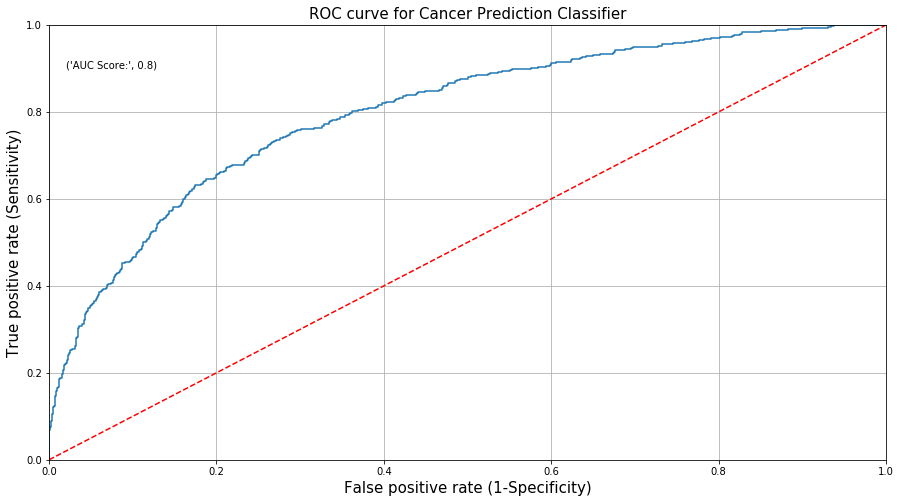

In [40]:
plot_roc(gnb_model1)

In [41]:
roc_auc_score(y_test1, y_pred_prob)

0.7535289736243009

In [42]:
confusion_matrix(y_test1, test_pred1)

array([[1549,   29],
       [ 330,   92]], dtype=int64)

# K-Nearest Neighbor

In [43]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train1, y_train1)

In [44]:
test_pred2 = knn_model.predict(X_test1)

In [45]:
print(classification_report(y_test1, test_pred2))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1578
           1       0.62      0.41      0.49       422

    accuracy                           0.82      2000
   macro avg       0.74      0.67      0.69      2000
weighted avg       0.81      0.82      0.81      2000



In [46]:
print(accuracy_score(y_test1, test_pred2))

0.8235


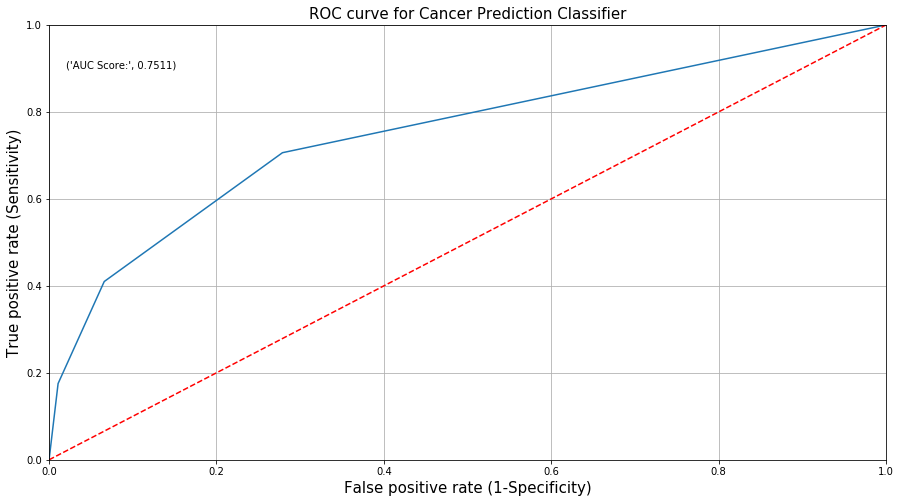

In [47]:
plot_roc(knn_model)

In [48]:
confusion_matrix(y_test1, test_pred2)

array([[1474,  104],
       [ 249,  173]], dtype=int64)

In [49]:
# Optimal value of K using GridSearchCV
tuned_paramaters = {'n_neighbors': np.arange(1,5),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
knn_classification = KNeighborsClassifier()

knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

knn_grid.fit(X_train1, y_train1)

print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'euclidean', 'n_neighbors': 4} 



In [50]:
test_pred3 = knn_grid.predict(X_test1)

In [51]:
print(classification_report(y_test1, test_pred3))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1578
           1       0.71      0.29      0.41       422

    accuracy                           0.83      2000
   macro avg       0.77      0.63      0.66      2000
weighted avg       0.81      0.83      0.80      2000



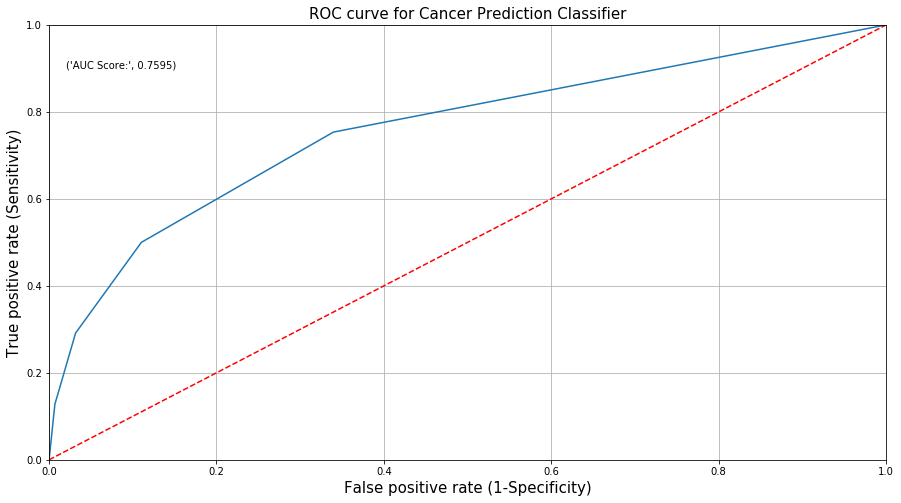

In [52]:
plot_roc(knn_grid)

In [53]:
confusion_matrix(y_test1, test_pred3)

array([[1528,   50],
       [ 299,  123]], dtype=int64)

# Decision Tree

In [54]:
decision_tree_classification = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train1, y_train1)

[Text(418.5, 380.52, 'X[1] <= 0.246\nentropy = 0.726\nsamples = 8000\nvalue = [6385, 1615]'),
 Text(209.25, 271.8, 'X[4] <= 1.667\nentropy = 0.499\nsamples = 5422\nvalue = [4827, 595]'),
 Text(104.625, 163.07999999999998, 'X[4] <= -0.052\nentropy = 0.458\nsamples = 5305\nvalue = [4792, 513]'),
 Text(52.3125, 54.360000000000014, 'entropy = 0.624\nsamples = 2616\nvalue = [2209, 407]'),
 Text(156.9375, 54.360000000000014, 'entropy = 0.24\nsamples = 2689\nvalue = [2583, 106]'),
 Text(313.875, 163.07999999999998, 'X[3] <= -0.726\nentropy = 0.88\nsamples = 117\nvalue = [35, 82]'),
 Text(261.5625, 54.360000000000014, 'entropy = 0.995\nsamples = 48\nvalue = [26, 22]'),
 Text(366.1875, 54.360000000000014, 'entropy = 0.559\nsamples = 69\nvalue = [9, 60]'),
 Text(627.75, 271.8, 'X[6] <= -0.03\nentropy = 0.968\nsamples = 2578\nvalue = [1558, 1020]'),
 Text(523.125, 163.07999999999998, 'X[1] <= 1.199\nentropy = 0.99\nsamples = 1176\nvalue = [519, 657]'),
 Text(470.8125, 54.360000000000014, 'entropy

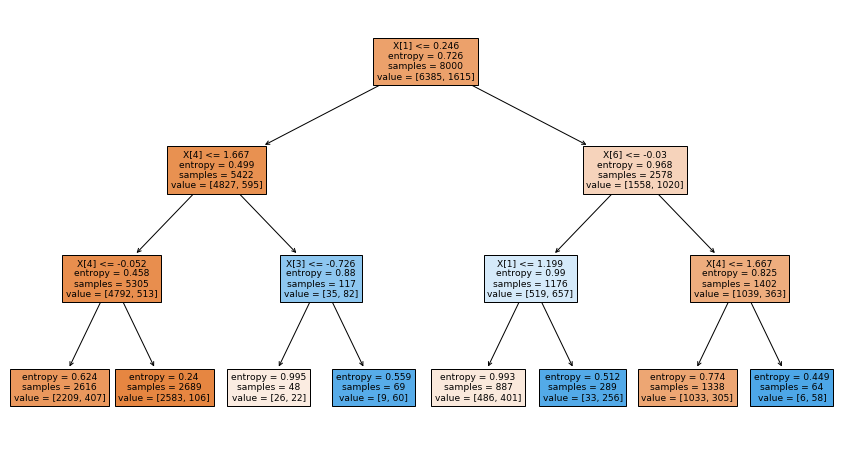

In [55]:
from sklearn import tree
tree.plot_tree(decision_tree,filled=True)

In [56]:
test_pred4 = decision_tree.predict(X_test1)

In [57]:
print(classification_report(y_test1, test_pred4))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1578
           1       0.85      0.22      0.35       422

    accuracy                           0.83      2000
   macro avg       0.84      0.61      0.63      2000
weighted avg       0.83      0.83      0.79      2000



In [58]:
print(accuracy_score(y_test1, test_pred3))

0.8255


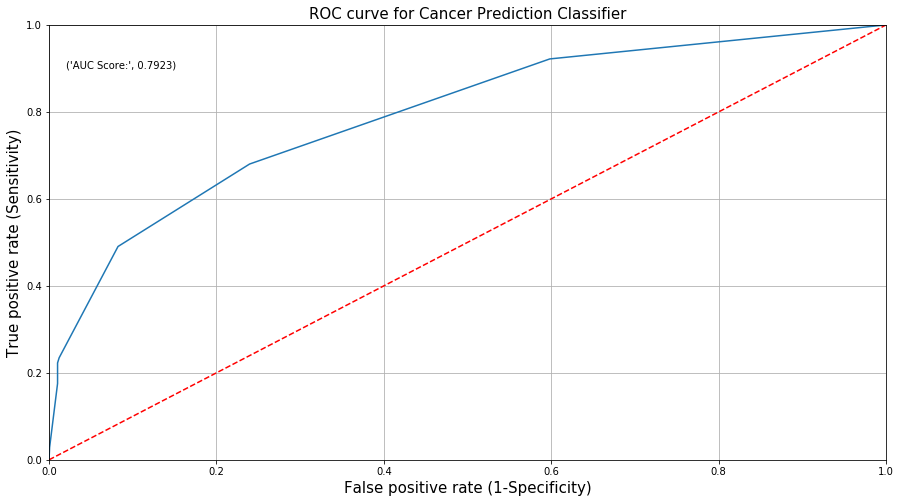

In [59]:
plot_roc(decision_tree)

In [60]:
# GridSearchCV

tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2,5),
                     'min_samples_split': range(2,5)
                     }]
 
decision_tree_classification = DecisionTreeClassifier(random_state = 10)


tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model = tree_grid.fit(X_train1, y_train1)

print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')


Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2} 



In [61]:
decision_tree_classification1 = DecisionTreeClassifier(max_depth = 4, criterion = 'gini',min_samples_split = 2 ,random_state = 10)

# fit the model using fit() on train data
decision_tree1 = decision_tree_classification1.fit(X_train1, y_train1)

[Text(418.5, 391.392, 'X[1] <= 0.341\ngini = 0.322\nsamples = 8000\nvalue = [6385, 1615]'),
 Text(209.25, 304.416, 'X[4] <= 1.667\ngini = 0.205\nsamples = 5674\nvalue = [5017, 657]'),
 Text(104.625, 217.44, 'X[4] <= -0.052\ngini = 0.183\nsamples = 5545\nvalue = [4980, 565]'),
 Text(52.3125, 130.464, 'X[1] <= -0.04\ngini = 0.275\nsamples = 2736\nvalue = [2286, 450]'),
 Text(26.15625, 43.488, 'gini = 0.237\nsamples = 2108\nvalue = [1819, 289]'),
 Text(78.46875, 43.488, 'gini = 0.381\nsamples = 628\nvalue = [467, 161]'),
 Text(156.9375, 130.464, 'X[3] <= -1.196\ngini = 0.079\nsamples = 2809\nvalue = [2694, 115]'),
 Text(130.78125, 43.488, 'gini = 0.034\nsamples = 1633\nvalue = [1605, 28]'),
 Text(183.09375, 43.488, 'gini = 0.137\nsamples = 1176\nvalue = [1089, 87]'),
 Text(313.875, 217.44, 'X[3] <= -0.726\ngini = 0.409\nsamples = 129\nvalue = [37, 92]'),
 Text(261.5625, 130.464, 'X[7] <= 0.567\ngini = 0.497\nsamples = 52\nvalue = [28, 24]'),
 Text(235.40625, 43.488, 'gini = 0.401\nsamples

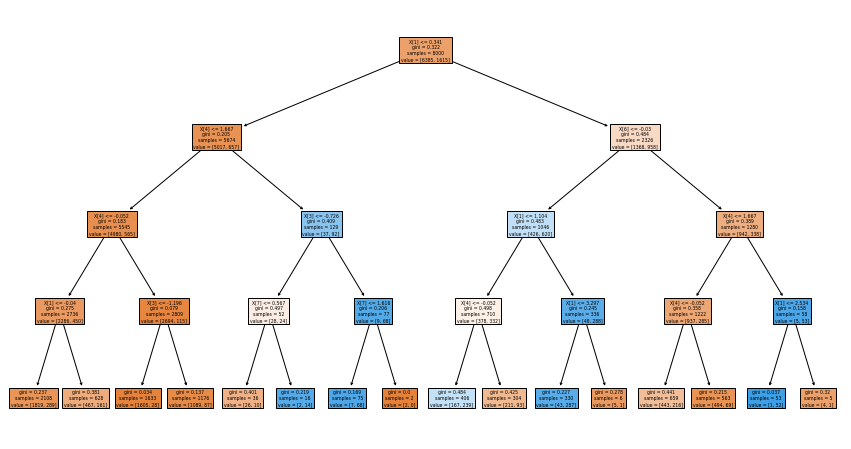

In [62]:
from sklearn import tree
tree.plot_tree(decision_tree1,filled=True)

In [63]:
test_pred5 = decision_tree1.predict(X_test1)

In [64]:
print(classification_report(y_test1, test_pred5))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1578
           1       0.74      0.42      0.54       422

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.72      2000
weighted avg       0.84      0.85      0.83      2000



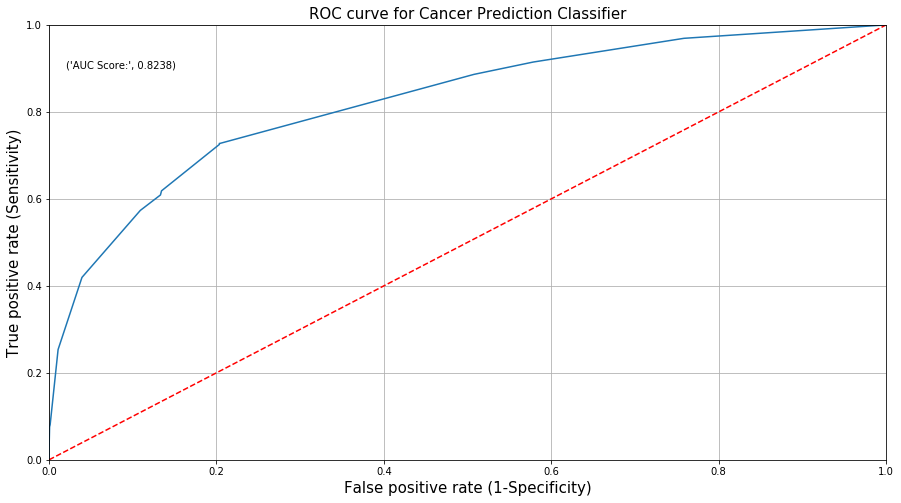

In [65]:
plot_roc(decision_tree1)

# Random Forest

In [66]:
rfc1 = RandomForestClassifier()

# train the model using the x and y training sets
random_forest=rfc1.fit(X_train1, y_train1)

In [67]:
test_pred6 = random_forest.predict(X_test1)

In [68]:
print(classification_report(y_test1, test_pred6))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1578
           1       0.76      0.45      0.57       422

    accuracy                           0.85      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.85      0.84      2000



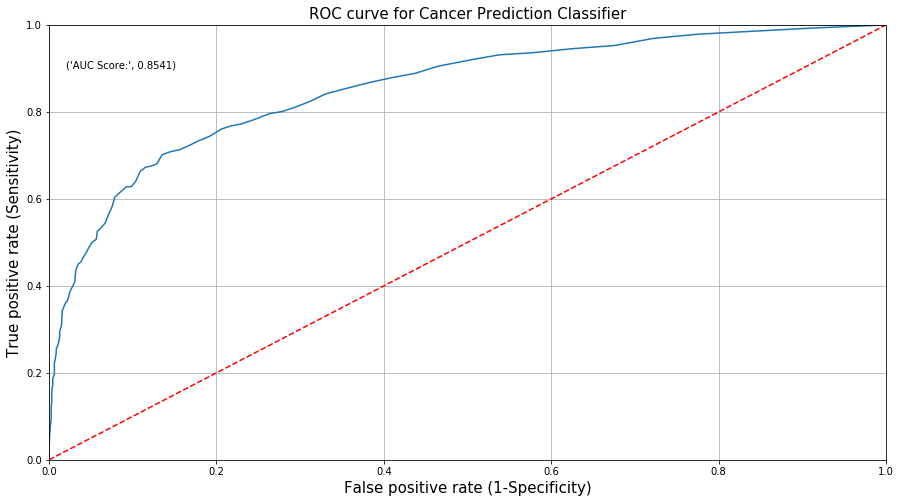

In [69]:
plot_roc(random_forest)

In [70]:
# GridSearchCV
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [30],
                     'max_depth': [5],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2,5],
                     'min_samples_leaf': [2,5],
                     'max_leaf_nodes': [2]}]

random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X_train1, y_train1)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 30} 



# Ada Boost

In [71]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(X_train1, y_train1)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [72]:
test_pred7 = ada_model.predict(X_test1)

In [73]:
print(classification_report(y_test1, test_pred7))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1578
           1       0.73      0.47      0.57       422

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



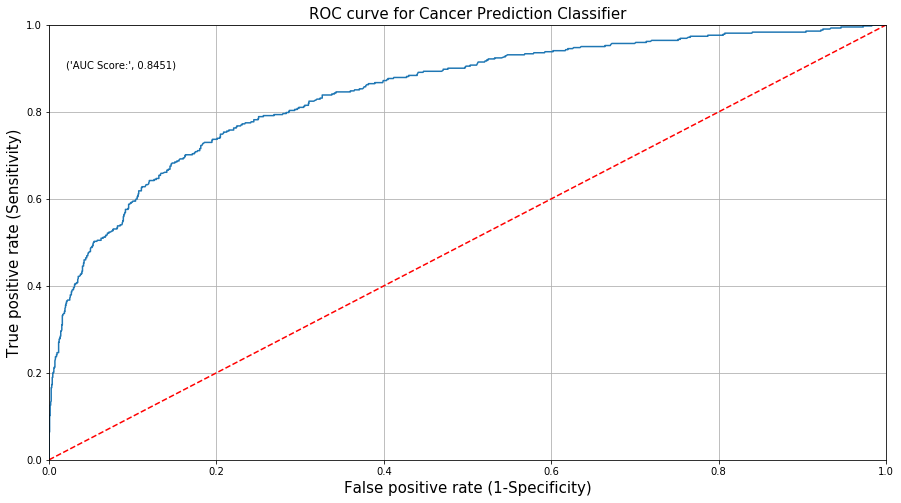

In [74]:
plot_roc(ada_model)

# Gradient Boost

In [75]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 2, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train1, y_train1)

GradientBoostingClassifier(max_depth=2, n_estimators=150, random_state=10)

In [76]:
test_pred8 = gboost_model.predict(X_test1)

In [77]:
print(classification_report(y_test1, test_pred8))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1578
           1       0.78      0.44      0.56       422

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



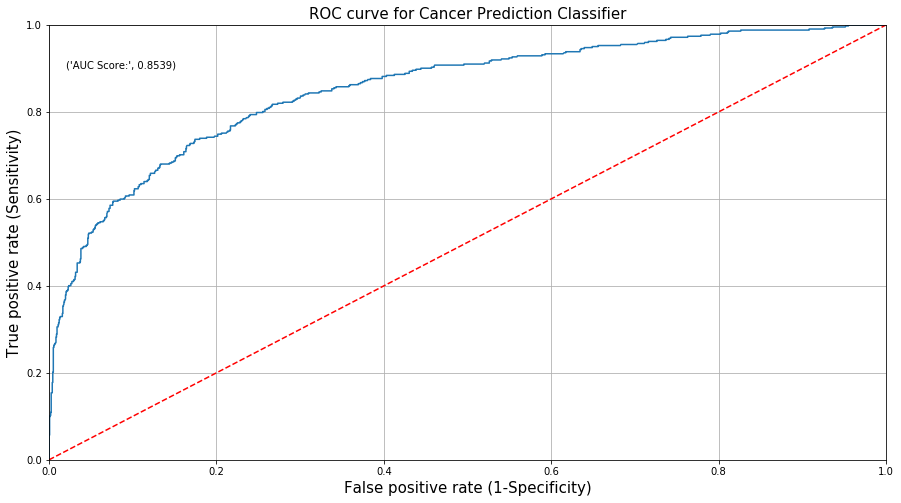

In [78]:
plot_roc(gboost_model)

In [79]:
confusion_matrix(y_test1, test_pred8)

array([[1525,   53],
       [ 235,  187]], dtype=int64)

# XGBoost

In [80]:
xgb_model = XGBClassifier(max_depth = 4, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train1, y_train1)

[16:43:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
test_pred9 = xgb_model.predict(X_test1)

In [82]:
print(classification_report(y_test1, test_pred9))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1578
           1       0.74      0.47      0.57       422

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



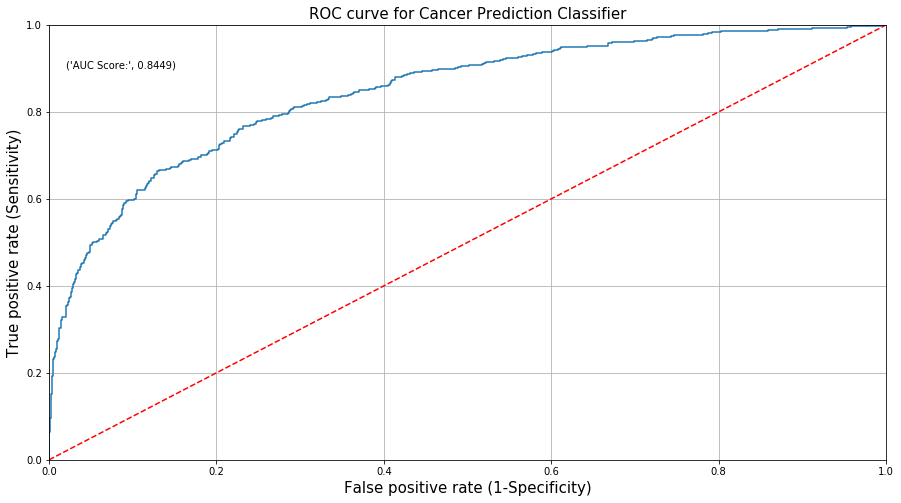

In [83]:
plot_roc(xgb_model)

In [84]:
# Tuning paramters using GridSearchCV
tuning_parameters = {'learning_rate': [0.5],
                     'max_depth': range(2,5),
                     'gamma': [4]}

xgb_model = XGBClassifier()

xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

xgb_grid.fit(X_train1, y_train1)

print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

[16:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:43:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [85]:
test_pred10 = xgb_grid.predict(X_test1)

In [86]:
print(classification_report(y_test1, test_pred10))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1578
           1       0.78      0.46      0.58       422

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.84      2000



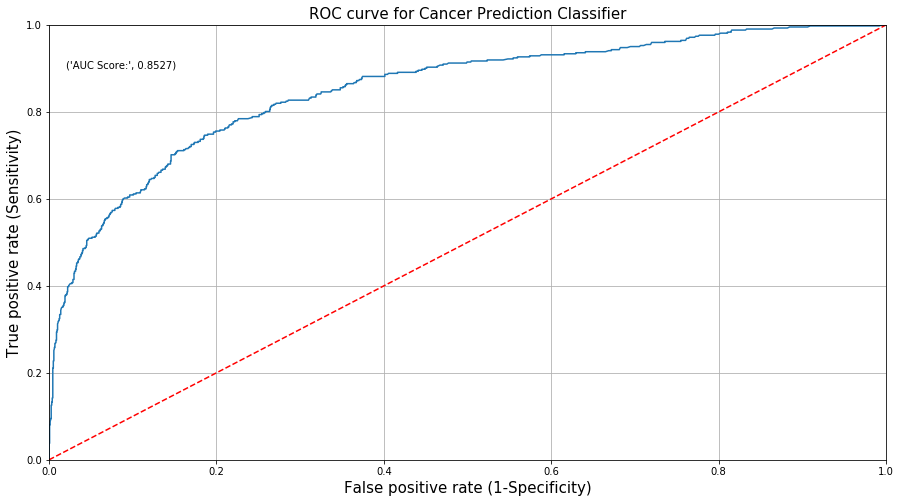

In [87]:
plot_roc(xgb_grid)

# Stacking Standardization

In [88]:
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', 
                                                     max_depth = 5, max_features = 'sqrt', 
                                                     max_leaf_nodes = 2, min_samples_leaf = 2, 
                                                     min_samples_split = 2, n_estimators = 30)),
                 ('KNN_model', KNeighborsClassifier(metric = 'manhattan', n_neighbors = 4)),
                 ('NB_model', GaussianNB())]

stack_model = StackingClassifier(estimators = base_learners, final_estimator = RandomForestClassifier())

# fit the model on train dataset
stack_model.fit(X_train1, y_train1)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=5,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=2,
                                                       min_samples_leaf=2,
                                                       n_estimators=30)),
                               ('KNN_model',
                                KNeighborsClassifier(metric='manhattan',
                                                     n_neighbors=4)),
                               ('NB_model', GaussianNB())],
                   final_estimator=RandomForestClassifier())

In [89]:
test_pred11 = stack_model.predict(X_test1)

In [90]:
print(classification_report(y_test1, test_pred11))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1578
           1       0.62      0.41      0.50       422

    accuracy                           0.82      2000
   macro avg       0.74      0.67      0.69      2000
weighted avg       0.81      0.82      0.81      2000



In [91]:
base_learners1 = [('RF_model', RandomForestClassifier(criterion = 'entropy', 
                                                     max_depth = 5, max_features = 'sqrt', 
                                                     max_leaf_nodes = 2, min_samples_leaf = 2, 
                                                     min_samples_split = 2, n_estimators = 30)),
                 ('DT_model', DecisionTreeClassifier(max_depth = 4, criterion = 'gini',
                                                     min_samples_split = 2 ,random_state = 10)),
                 ('XGBoost', XGBClassifier(gamma = 4, learning_rate = 0.5, max_depth = 4))]

stack_model = StackingClassifier(estimators = base_learners1, final_estimator = XGBClassifier())

# fit the model on train dataset
stack_model.fit(X_train1, y_train1)

[16:43:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:43:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:43:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:43:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

StackingClassifier(estimators=[('RF_model',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=5,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=2,
                                                       min_samples_leaf=2,
                                                       n_estimators=30)),
                               ('DT_model',
                                DecisionTreeClassifier(max_depth=4,
                                                       random_state=10)),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytr...
     

In [92]:
test_pred12 = stack_model.predict(X_test1)

In [93]:
print(classification_report(y_test1, test_pred12))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1578
           1       0.70      0.48      0.57       422

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000

